# Chapter 4
# Train and Test Split

We don't train the machine learning algorithm by giving it the entire set of data. We keep a part for later, when we want to test if the ML algorithm has learned correctly.

In machine learning, the train-test split means splitting the data into two parts:
1. Training data (`train_data`)
2. Testing data  (`test_data`)

The machine learning algorithm is trained on the `train_data`, and then it is applied to the `test_data`. The machine learning output is compared with the actual output for the `test_data` to evaluate how the model performs on *unseen* data (data not known at the time of the training).

Let us split our data into train and test.

In [2]:
# Import libraries

# For data manipulation
import pandas as pd

# Import sklearn's train-test split module
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt

## Read the Data
For convenience, we saved the target (`y`), and features (`X`), prepared for $JPM in the previous sections, as CSV flies.

Let us first upload these cvs files using the `read_csv` moethod of the `pandas` library:

In [3]:
# Read the features

X = pd.read_csv('/Users/nacho/Documents/GitHub/python_course/books/Machine-Learning-Trading/assets/machine-learning-in-trading-main-main/data_modules/JPM_features_2017_2019.csv',
                index_col=0, parse_dates=True)

# Read the target
y = pd.read_csv('/Users/nacho/Documents/GitHub/python_course/books/Machine-Learning-Trading/assets/machine-learning-in-trading-main-main/data_modules/JPM_target_2017_2019.csv',
                index_col=0, parse_dates=True)


In the train-test split you divide the data into two parts.

**But what proportion is the data split into?** In machine learning, we should select the train-test split proportion such that the training data is a fair representation of the whole data. If the train-test split is 80%-20%; it means 80% of the original data is the `train_data` and the remaining 20% is the `test_data`. 

The 80%-20% proportion is a popular proportion to split the data, but you can use other popular proportions like 90%-10% or 75%-25%.

We will use a ready-made method called `train_test_split` from the `sklearn` module to perform the train-test split:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size, shuffle)
```

Where:

+ `X` The features from the entire dataset
+ `y` The target values from the entire dataset
+ `train_size` The proportion of the training data
+ `suffle` Parameter to specify shuffling of data

The method returns:

1. `X_train` The features from the training dataset
2. `X_test`  The features from the testing dataset
3. `y_train` The target values from the training dataset
4. `y_test`  The target values form the testing dataset

Let's use the `train_test_split` method to split the data in an 80% train and 20% test proportion.

In [4]:
# Obtain the features and target for the 'train_data' and 'test_data'
# The features (X) and the target (y) is passed along with size of the
# train_data as a percentage of the total data

X_train, X_test, y_train, y_test = \
                            train_test_split(X, y, train_size=0.80)

# Print the dimensions of the variables
print(f"The shape of the X variable is {X.shape}.")
print(f"The shape of the y variable is {y.shape}. \n")

print(f"The shpae of the X_train variable is {X_train.shape}.")
print(f"The shape of the y_train variable is {y_train.shape}. \n")

print(f"The shape of the X_test variable is {X_test.shape}.")
print(f"The shape of the y_test variable is {y_test.shape}. \n")

The shape of the X variable is (19317, 7).
The shape of the y variable is (19317, 1). 

The shpae of the X_train variable is (15453, 7).
The shape of the y_train variable is (15453, 1). 

The shape of the X_test variable is (3864, 7).
The shape of the y_test variable is (3864, 1). 



Some observations after the train-test split:

1. The dimensions of the original dataset show that there were 7 features and 19318 observations in the feature dataset (`X`). The target variable (`y`) has one column and the same number of observations as `X`.
2. The dimensions of the `train_data` show that `X_train` has 7 features and 15454 observations. That is 80% of 19318, rounded down to the nearest integer. The target variable for the train data (`y_train`) has one column and the same number of observations as `X_train`.
3. The dimensions of the `test_data` show that `X_test` has 7 features and 3864 observations. That is the balance 20% of 19318. The target variable for the train data (`y_test`) has one column and the same number of observations as `X_test`.


### Visualize the Data
Let's plot one of the columns of the features to see how the data is split:

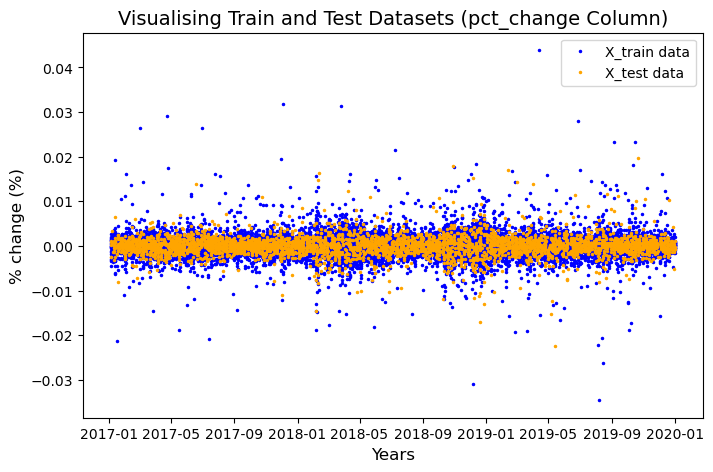

In [6]:
# Plot the data
plt.figure(figsize=(8, 5))

plt.plot(X_train['pct_change'], linestyle='None', marker='.', 
         markersize=3.0, label='X_train data', color='blue')

plt.plot(X_test['pct_change'], linestyle='None', marker='.',
         markersize=3.0, label='X_test data', color='orange')


# Set the title and axis label
plt.title("Visualising Train and Test Datasets (pct_change Column)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

We can see that the `train_data` (blue point) and the `test_data` (orange points) are randomly shuffled.

**Do we want randomly shuffled data for our train and test dataset?** The answer depends on what type of data you are handling. If you are handling *discrete* observations, like the number of faulty products in a factory production line, then you can shuffle the indices for the train-test splot.

But here we are dealing with financial time series. For time-series data, the order of indices matters and you cannot do random shuffling. This is because the indices in time series data are timestamps that occur one after the other (in sequence).

The data wouls make no sense if the timestamps are shuffled.The reason is simple: You cannot use the data from 2029 to train the model, and then use the model to predict the prices in 2024. It is not possible in real life as we do not have access to future data.

### Correct Way of Splitting Time-Series Data
To split the time-series data, we must not shuffle the datasets. We can specify the `suffle` parameter to `False`. It is set to `True` by default, so not specifying it in the method call results in a shuffled output.

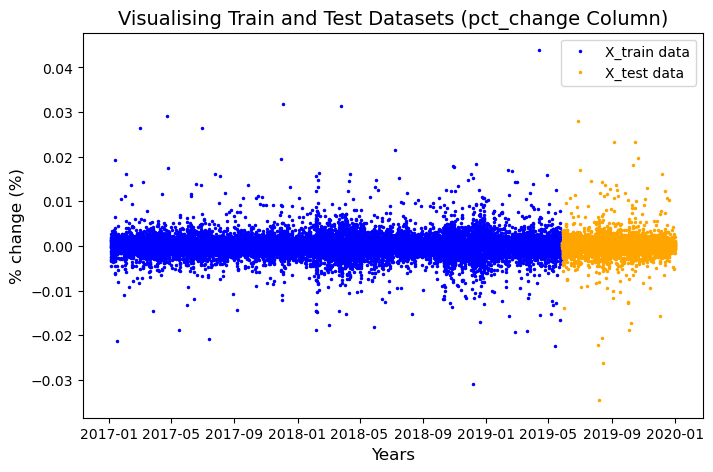

In [7]:
# Obtain the features and target for the 'train_data' and 'test_data' without shuffling
X_train, X_test, y_train, y_test = \
                            train_test_split(X, y, train_size=0.80, shuffle=False)

# Plot the data
plt.figure(figsize=(8, 5))

plt.plot(X_train['pct_change'], linestyle='None', marker='.', 
         markersize=3.0, label='X_train data', color='blue')

plt.plot(X_test['pct_change'], linestyle='None', marker='.',
         markersize=3.0, label='X_test data', color='orange')


# Set the title and axis label
plt.title("Visualising Train and Test Datasets (pct_change Column)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

As seen in the plot, the train and test data points are not shuffled. The model is trained on `train_data` (blue part), and then the performance is evaluated for the `test_data` (orange part). 

The previous issue where we possibly were using future data to predict the past will not occur now.

In this illustration, the model will be trained on data up to May 2019 (blue part), and then the model will be used to make predictions for the future.

Next we are going to train the model and use the trained model to make some predictions.